In [128]:
import numpy as np
import random
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib 

In [135]:
def myGMM(X, K, maxIter):

    '''
    This is a function that performs GMM clustering
    The input is X: N*d, the input data
                 K: integer, number of clusters
                 maxIter: integer, number of iterations
             
    The output is C: K*d the center of clusters
                  I: N*1 the label of data
                  Loss: [maxIter] likelihood in each
                  step
    '''
    
    # number of vectors in X
    [N, d] = np.shape(X)

    # construct indicator matrix (each entry corresponds to the cluster of each point in X)
    I = np.zeros([N, 1])
    
    # construct centers matrix
    C = np.zeros([K, d])
    
    # the list to record error
    Loss = []

    #####################################################################
    # TODO: Implement the EM method for Gaussian mixture model          #
    #####################################################################
    pi=[]
    mu=[]
    cov=[]
    post=[]
    itr=0
    new_loss=0
    post = np.zeros([N, K])
    loss=0
    
    while itr<maxIter:
        new_loss=0
        
        if itr==0:        
            #initialize pi,mu and cov for all K classes
            for k in range(K):
                pi.append(1)
                mu.append([4*k,1*k])
                cov.append([[3, 1],[2, 5]]) #random initializations
                
        else:
            #update pi, mu and cov for all K classes
            
            for k in range(K):
                #print('K= ',k)
                #cov[k]=[]
                pi[k]=np.sum(post,axis=0)[k]/N    
                mu[k]= [np.sum(np.multiply(post[:,k],X[:,0]))/np.sum(post,axis=0)[k],
                        np.sum(np.multiply(post[:,k],X[:,1]))/np.sum(post,axis=0)[k]]
                #UPDATE THIS EQUATION FOR COVARIANCE
                cov_numer=np.zeros([d, d])
                for i in range(N):
                    #print((X[i]-mu[k]),(X[i]-mu[k]).T))
                    #print(np.multiply(post[i,k],np.outer((X[i]-mu[k]),(X[i]-mu[k]))))
                    cov_numer+=(np.multiply(post[i,k],np.outer((X[i]-mu[k]),(X[i]-mu[k]))))
                cov[k]=cov_numer/np.sum(post,axis=0)[k]
        
        #expectation step
        for i in range(N):
            marginal_prb_x=0
            joint_prb_list=[]
            for k in range(K):           
                #print('class=',k)
                joint_prb=pi[k]*(np.linalg.det(cov[k])**-0.5)*np.exp(-0.5*np.dot(np.dot((X[i,:]-mu[k]).T,np.linalg.inv(cov[k])),(X[i,:]-mu[k])))
                joint_prb_list.append(joint_prb)
                marginal_prb_x+=joint_prb
            
            post[i]=(joint_prb_list/marginal_prb_x)

        
            #update loss
            new_loss+=np.log(marginal_prb_x) #adding marginal prob over all samples is loss
        
        #update Loss array
        Loss.append(new_loss)
        if np.abs(new_loss-loss)<.005:
            print('Loss not changing much after iteration-',itr)
            
            #create C matrix
            for k in range(K):
                C[k][0]=mu[k][0]
                C[k][1]=mu[k][1]
            #print(C)
            
            #create I matrix
            for i in range(N):
                c=np.argmax(post[i])
                I[i]=c
            
            break
        else:
            loss=new_loss
            itr+=1

    
    #####################################################################
    #                      END OF YOUR CODE                             #
    #####################################################################
    return C, I, Loss

In [136]:
def plot(X, C, K):   
    #####################################################################
    # TODO: Implement the plot function                                 #
    #####################################################################
    #pass
    #you may want to use
    plt.scatter(X[:,0], X[:,1], c=C)
    plt.title('Visualization of K = '+str(K), fontsize=16)
    plt.show()
    #plt.save(...)
    #####################################################################
    #                      END OF YOUR CODE                             #
    #####################################################################
    
    
def plot_losses(Losses):   
    #####################################################################
    # TODO: Implement the plot function                                 #
    #####################################################################
    #you may want to use
    plt.title('Plot of losses', fontsize=16)
    k=0
    for loss in Losses:
        k+=1
        plt.plot(range(len(loss)),loss,label=k)
        plt.hold
    plt.legend()
    plt.show()
    #plt.save(...)
    #####################################################################
    #                      END OF YOUR CODE                             #
    #####################################################################


('Loss not changing much after iteration-', 18)


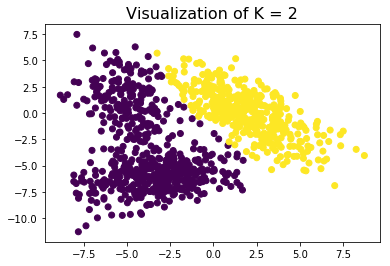

('Loss not changing much after iteration-', 58)


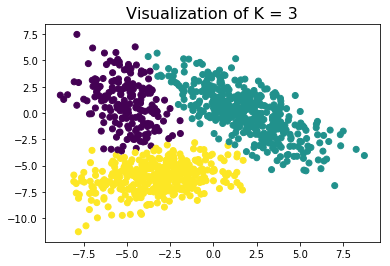

('Loss not changing much after iteration-', 64)


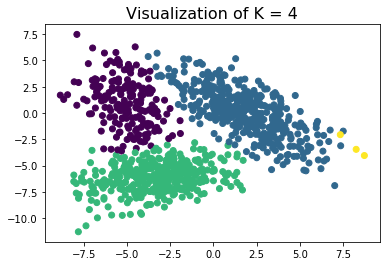

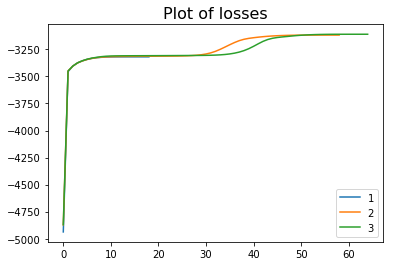

In [137]:
data = scipy.io.loadmat('data/Q2.mat')['X']

#Set parameters
max_iter = 100 # choose one that is suitable

Losses = []
for K in [2,3,4]: #You should do K=2, 3, 4
    #Do clustering
    C, I, Loss = myGMM(data, K, max_iter)
    Losses.append(Loss)
    plot(data,I,K)

plot_losses(Losses)
